In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
from wordcloud import WordCloud
from requests import get
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import acquire
import prepare
from sklearn.model_selection import train_test_split

In [2]:
df = prepare.git_df()

In [3]:
df

,index,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...,...
595,596,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,597,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,598,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,599,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            600 non-null    int64 
 1   repo             600 non-null    object
 2   language         600 non-null    object
 3   original         600 non-null    object
 4   clean            600 non-null    object
 5   stemmed          600 non-null    object
 6   lemmatized       600 non-null    object
 7   original_length  600 non-null    int64 
 8   true_clean       600 non-null    object
dtypes: int64(2), object(7)
memory usage: 42.3+ KB


In [5]:
df.language = df.language.str.lower()

In [6]:
df.language.value_counts()

php                 108
c++                 107
python              106
c                   102
html                 83
javascript           20
java                 20
jupyter notebook     20
c#                   18
typescript           16
Name: language, dtype: int64

In [7]:
df.language = df.language.str.replace('javascript','other').str.replace('java','other').str.replace('c#','other').str.replace('typescript','other').str.replace('jupyter notebook','other')
df

,index,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0,0voice/interview_internal_reference,python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,1,2dust/v2rayN,other,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,2,30-seconds/30-seconds-of-code,other,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,3,521xueweihan/HelloGitHub,python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,4,Airblader/i3,c,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...,...
595,596,yuzu-emu/yuzu,c++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,597,zealdocs/zeal,c++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,598,zergtant/pytorch-handbook,other,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,599,zero-to-mastery/start-here-guidelines,python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [8]:
def split_data(df, column):
    '''This function takes in two arguments, a dataframe and a string. The string argument is the name of the
        column that will be used to stratify the train_test_split. The function returns three dataframes, a 
        training dataframe with 60 percent of the data, a validate dataframe with 20 percent of the data and test
        dataframe with 20 percent of the data.'''
    train, test = train_test_split(df, test_size=.2, random_state=217, stratify=df[column])
    train, validate = train_test_split(train, test_size=.25, random_state=217, stratify=train[column])
    return train, validate, test

In [9]:
train, validate, test = split_data(df, 'language')

In [10]:
ADDITIONAL_STOPWORDS = ['yes']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
python_words = clean(' '.join(train[train.language == 'python']['true_clean']))
c_words = clean(' '.join(train[train.language == 'c']['true_clean']))
php_words = clean(' '.join(train[train.language == 'php']['true_clean']))
cplus_words = clean(' '.join(train[train.language == 'c++']['true_clean']))
html_words = clean(' '.join(train[train.language == 'html']['true_clean']))
other_words = clean(' '.join(train[train.language == 'other']['true_clean']))
all_words = clean(' '.join(train['true_clean']))

In [12]:
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
php_freq = pd.Series(php_words).value_counts()
cplus_freq = pd.Series(cplus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [13]:
python_freq = python_freq[python_freq > 2]
python_freq

python       1393
file          661
code          546
star          527
model         405
             ... 
jargon          3
kenton          3
guarantee       3
disabled        3
casper          3
Length: 2392, dtype: int64

In [14]:
php_freq = php_freq[php_freq > 2]
php_freq

value        208
file         198
client       182
security     175
version      160
            ... 
reversing      3
engineer       3
hope           3
solver         3
force          3
Length: 1103, dtype: int64

In [15]:
cplus_freq = cplus_freq[cplus_freq > 2]
cplus_freq

build         381
medium        303
install       229
file          227
version       222
             ... 
investment      3
growing         3
idiomatic       3
covenant        3
school          3
Length: 1547, dtype: int64

In [16]:
c_freq = c_freq[c_freq > 2]
c_freq

example      365
node         325
file         316
build        314
message      256
            ... 
sidecar        3
humidity       3
increment      3
fifteen        3
cipher         3
Length: 1492, dtype: int64

In [17]:
html_freq = html_freq[html_freq > 2]
html_freq

heavy          1714
minus          1711
sign           1710
lecture         417
learning        361
               ... 
sparkling         3
axis              3
critical          3
lightweight       3
exploring         3
Length: 1235, dtype: int64

In [18]:
other_freq = other_freq[other_freq > 2]
other_freq

target        315
code          301
blank         297
function      284
data          279
             ... 
safety          3
eureka          3
propagate       3
ambassador      3
analyzer        3
Length: 1737, dtype: int64

In [19]:
all_freq = all_freq[all_freq > 2]
all_freq

python      1809
sign        1742
heavy       1720
minus       1714
file        1690
            ... 
elapse         3
strive         3
unwanted       3
magma          3
kent           3
Length: 4252, dtype: int64

In [20]:
word_counts = pd.concat([python_freq, c_freq, php_freq, cplus_freq, html_freq, other_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['python','c','php','cplus','html','other','all']
word_counts.head()

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
file,661,316,198,227,122,166,1690
code,546,198,149,211,155,301,1560
star,527,0,8,6,11,9,563
model,405,15,71,62,46,190,789


In [21]:
word_counts.sort_values('all', ascending=False)

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
sign,8,0,6,8,1710,9,1742
heavy,3,0,0,0,1714,0,1720
minus,0,0,0,0,1711,0,1714
file,661,316,198,227,122,166,1690
...,...,...,...,...,...,...,...
sane,0,0,0,0,3,0,3
shah,0,0,0,0,3,0,3
portugal,0,0,0,0,3,0,3
laziness,0,0,0,0,3,0,3


<AxesSubplot:>

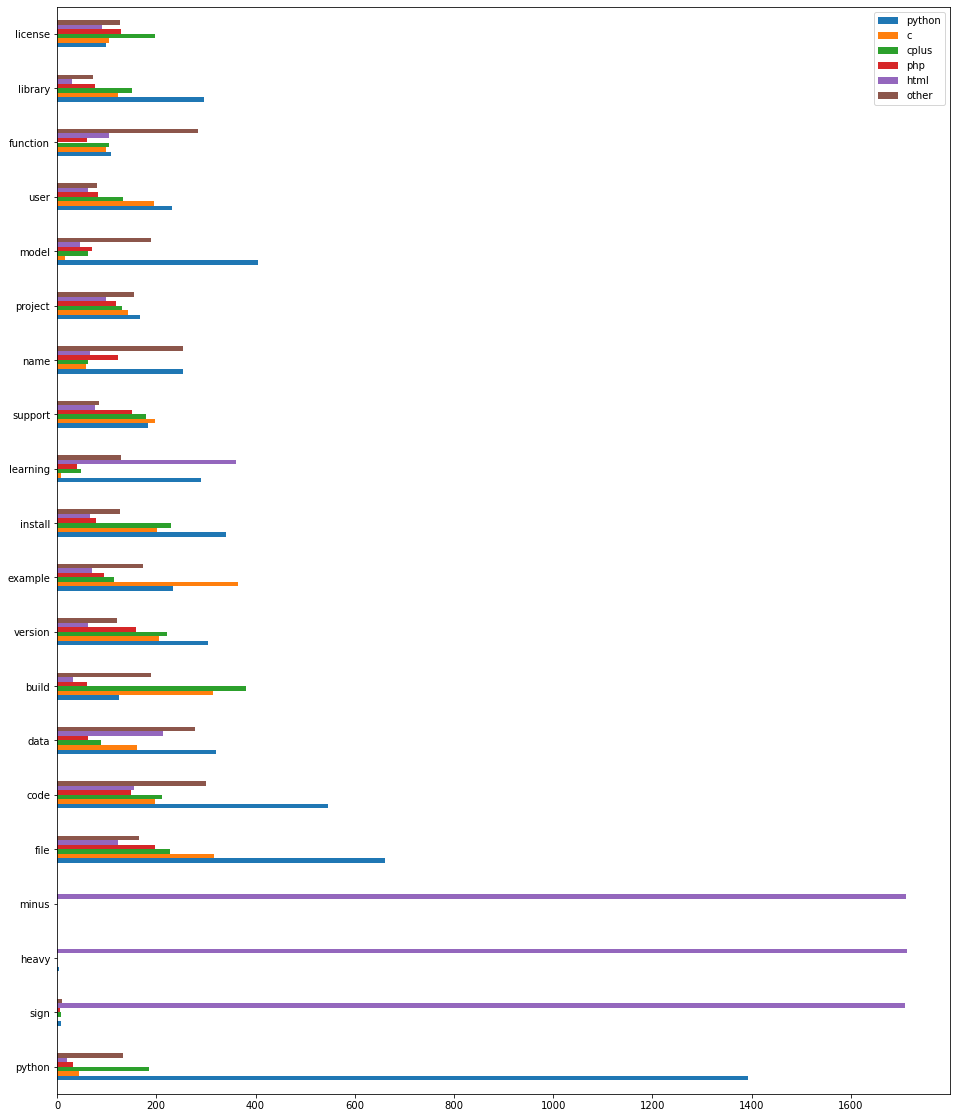

In [22]:
word_counts.sort_values(
    'all', ascending=False
)[['python','c','cplus','php','html','other']].head(20).plot.barh(figsize=[16,20])

<AxesSubplot:>

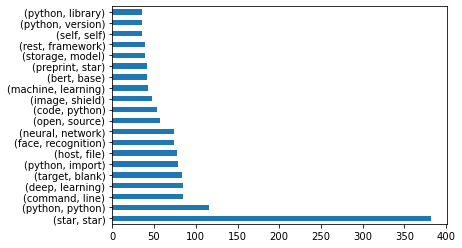

In [23]:
pd.Series(nltk.bigrams(python_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

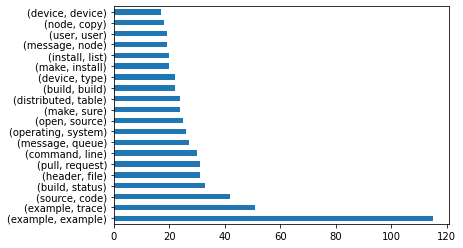

In [24]:
pd.Series(nltk.bigrams(c_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

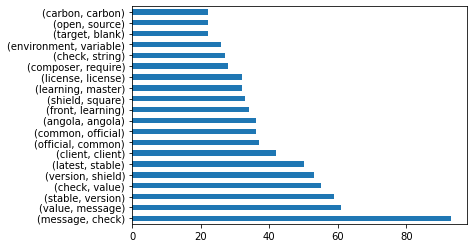

In [25]:
pd.Series(nltk.bigrams(php_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

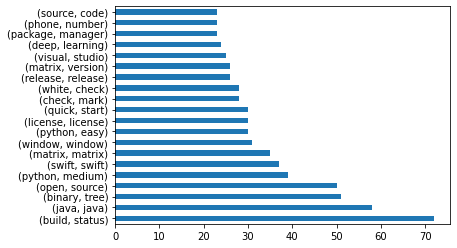

In [26]:
pd.Series(nltk.bigrams(cplus_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

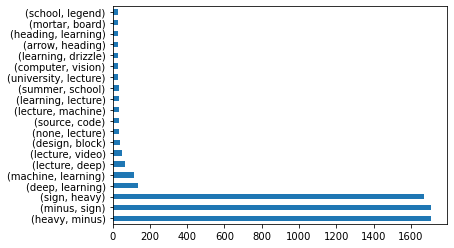

In [27]:
pd.Series(nltk.bigrams(html_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

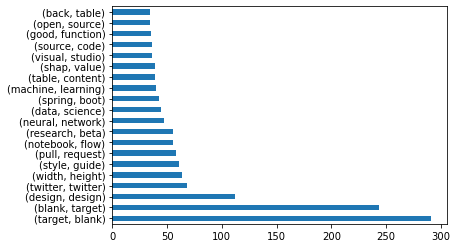

In [28]:
pd.Series(nltk.bigrams(other_words)
         ).value_counts().head(20).plot.barh()

In [29]:
train.language.value_counts()

c++       65
python    64
php       64
c         61
other     56
html      50
Name: language, dtype: int64

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(df.true_clean)

In [73]:
bag_of_words

<600x9991 sparse matrix of type '<class 'numpy.int64'>'
	with 115657 stored elements in Compressed Sparse Row format>

In [74]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [75]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [76]:
bow

,aaron,abac,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,...,zestful,ziggurat,zigzag,zing,zippy,zombie,zonal,zone,zoom,zorro
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
bow.apply(lambda row: row / row.sum(), axis=1)

,aaron,abac,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,...,zestful,ziggurat,zigzag,zing,zippy,zombie,zonal,zone,zoom,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.012821,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.true_clean)
pd.DataFrame(bag_of_words.todense(), 
             columns=tfidf.get_feature_names_out())

,aaron,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,abigail,...,young,youve,zach,zend,zephyr,zero,zigzag,zing,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.014164,0.0,0.0,0.000000,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.008798,0.0


In [79]:
# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indeces, and the values into values
pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

aaron        5.502584
abacus       6.195731
abandoned    5.790266
abase        6.195731
abate        6.195731
               ...   
zero         3.392370
zigzag       5.790266
zing         5.790266
zone         4.691653
zoom         6.195731
Length: 7285, dtype: float64

In [80]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_grams = cv.fit_transform(train.true_clean)

In [81]:
pd.DataFrame(bag_of_grams.todense(),
            columns=cv.get_feature_names())

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron conditional,aaron deep,aaron irfan,aaron junker,aaron recurrent,abacus constructor,abandoned favor,abandoned significant,abase entity,abate juan,...,zone important,zone location,zone mass,zone navigable,zone omit,zone threat,zone trend,zone width,zoom keyboard,zoom zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language

In [92]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.3888888888888889

In [93]:
# as with any other sklearn transformation, 
# transform only on our validate and/or test, 
# only fit on train
X_validate_bow = cv.transform(X_validate)
tree.score(X_validate_bow, y_validate)

0.375

In [44]:
pd.Series(
    dict(
    zip(cv.get_feature_names(), 
    tree.feature_importances_))).sort_values().tail()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


build       0.071533
love        0.080462
java        0.086446
composer    0.123265
python      0.152046
dtype: float64